<a href="https://colab.research.google.com/github/AtharvaJ-236/Data-Science/blob/main/DS_Prac_4_HypothesisTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Fifa_world_cup_matches.csv to Fifa_world_cup_matches.csv


In [2]:
import pandas as pd

df = pd.read_csv('Fifa_world_cup_matches.csv')
df[
    [
     'category',
     'total attempts team1',
     'total attempts team2',
     'on target attempts team1',
     'on target attempts team2',
     'assists team1',
     'assists team2'
    ]
].head()


,category,total attempts team1,total attempts team2,on target attempts team1,on target attempts team2,assists team1,assists team2
0,Group A,5,6,0,3,0,1
1,Group B,13,8,7,3,6,1
2,Group A,14,9,3,3,0,1
3,Group B,6,7,1,3,1,0
4,Group C,14,3,6,2,0,1


In [3]:
from scipy import stats

team1_attempts = df['total attempts team1']

t_stat, p_val = stats.ttest_1samp(team1_attempts, 10)

print("One-Sample T-Test (Team-1 Attempts)")
print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject H0 → Mean attempts differ from 10")
else:
    print("Fail to reject H0 → No evidence mean differs from 10")


One-Sample T-Test (Team-1 Attempts)
t-statistic: 1.8350861015358797
p-value: 0.07121450562907301
Fail to reject H0 → No evidence mean differs from 10


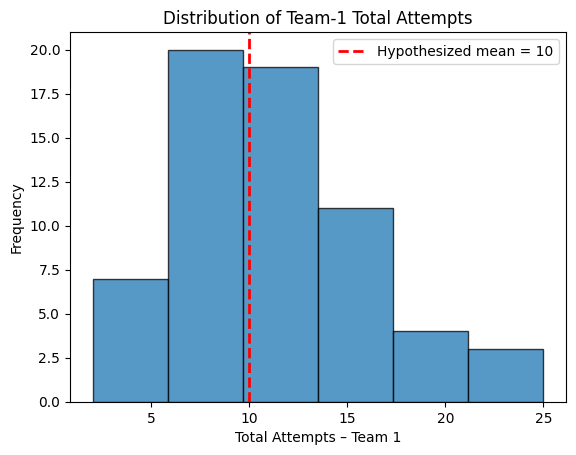

In [4]:
import matplotlib.pyplot as plt

plt.hist(team1_attempts, bins=6, alpha=0.75, edgecolor='black')
plt.axvline(10, color='red', linestyle='dashed', linewidth=2, label='Hypothesized mean = 10')
plt.xlabel('Total Attempts – Team 1')
plt.ylabel('Frequency')
plt.title('Distribution of Team-1 Total Attempts')
plt.legend()
plt.show()


In [5]:
team1 = df['total attempts team1']
team2 = df['total attempts team2']

t_stat2, p_val2 = stats.ttest_ind(team1, team2)

print("Two-Sample T-Test (Team-1 vs Team-2 Attempts)")
print("t-statistic:", t_stat2)
print("p-value:", p_val2)

if p_val2 < 0.05:
    print("Reject H0 → Team attempts differ significantly.")
else:
    print("Fail to reject H0 → No significant difference.")


Two-Sample T-Test (Team-1 vs Team-2 Attempts)
t-statistic: -0.14714356862654523
p-value: 0.8832538866244295
Fail to reject H0 → No significant difference.


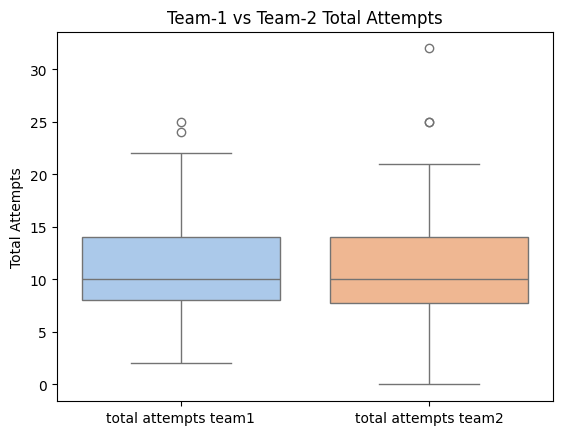

In [6]:
import seaborn as sns

sns.boxplot(data=df[['total attempts team1','total attempts team2']], palette='pastel')
plt.title("Team-1 vs Team-2 Total Attempts")
plt.ylabel("Total Attempts")
plt.show()


In [7]:
t_stat3, p_val3 = stats.ttest_rel(
    df['number of goals team1'],
    df['number of goals team2']
)

print("Paired T-Test (Goals Team-1 vs Team-2)")
print("t-statistic:", t_stat3)
print("p-value:", p_val3)

if p_val3 < 0.05:
    print("Reject H0 → Significant goal difference.")
else:
    print("Fail to reject H0 → No significant goal difference.")


Paired T-Test (Goals Team-1 vs Team-2)
t-statistic: 2.0162090513922344
p-value: 0.048046651285684736
Reject H0 → Significant goal difference.


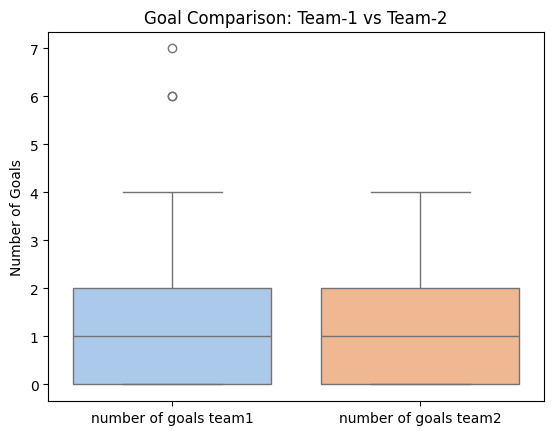

In [8]:
sns.boxplot(data=df[['number of goals team1','number of goals team2']], palette='pastel')
plt.title("Goal Comparison: Team-1 vs Team-2")
plt.ylabel("Number of Goals")
plt.show()


In [9]:
from scipy.stats import chi2_contingency

# Create categorical bins for attempts
df['attempt bins'] = pd.cut(
    df['on target attempts team1'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)

contingency_table = pd.crosstab(df['category'], df['attempt bins'])

chi2, p_val4, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Result")
print("Chi2:", chi2)
print("p-value:", p_val4)

if p_val4 < 0.05:
    print("Reject H0 → Category & attempts are dependent")
else:
    print("Fail to reject H0 → Category & attempts are independent")


Chi-Square Test Result
Chi2: 31.65079365079365
p-value: 0.13589103199748634
Fail to reject H0 → Category & attempts are independent


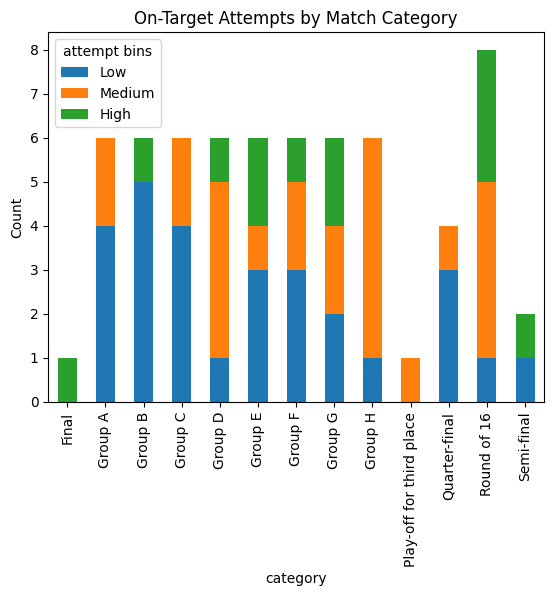

In [10]:
contingency_table.plot(kind='bar', stacked=True)

plt.title("On-Target Attempts by Match Category")
plt.ylabel("Count")
plt.show()


In [11]:
from statsmodels.stats.weightstats import ztest

assists = df['assists team1']

z_stat, p_val5 = ztest(assists, value=5, ddof=1)

print("Z-Test (Assists Team-1)")
print("z-statistic:", z_stat)
print("p-value:", p_val5)

if p_val5 < 0.05:
    print("Reject H0 → Mean assists differ from 5")
else:
    print("Fail to reject H0 → No evidence assists differ from 5")


Z-Test (Assists Team-1)
z-statistic: -22.462109523435874
p-value: 9.745004749167177e-112
Reject H0 → Mean assists differ from 5


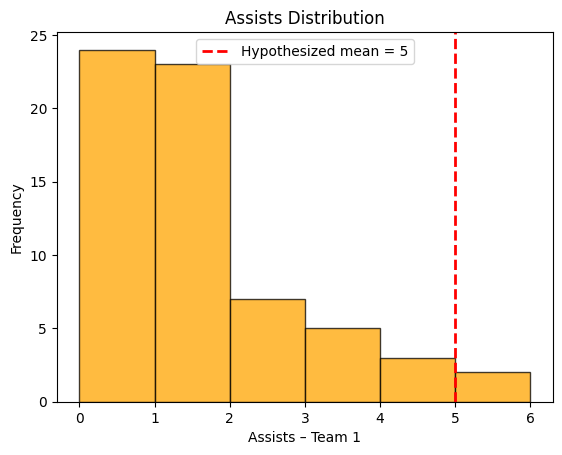

In [12]:
plt.hist(assists, bins=6, edgecolor='black', alpha=0.75, color='orange')
plt.axvline(5, color='red', linestyle='dashed', linewidth=2, label='Hypothesized mean = 5')
plt.xlabel("Assists – Team 1")
plt.ylabel("Frequency")
plt.title("Assists Distribution")
plt.legend()
plt.show()
